<a href="https://colab.research.google.com/github/CGS2002/IIIT-AIML/blob/main/AIML_Module_1_Lab_1_Extracting_features_from_data_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##AIML Module 1 - Lab 1
# Extracting features from data





In [151]:
! pip install wikipedia

import wikipedia
import nltk
from nltk.util import ngrams
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import re
import unicodedata
import plotly.express as px
import pandas as pd

# Part 1: Features of text
How do we apply machine learning on text? We can't directly use the text as input to our algorithms. We need to convert them to features. In this notebook, we will explore a simple way of converting text to features.

Let us download a few documents off Wikipedia.

In [152]:
topic1 = 'Giraffe'
topic2 = 'Elephant'

wikipedia.set_lang('en')

eng1 = wikipedia.page(topic1).content
eng2 = wikipedia.page(topic2).content

wikipedia.set_lang('fr')

fr1 = wikipedia.page(topic1).content
fr2 = wikipedia.page(topic2).content

This is what the text looks like:

In [153]:
fr2

'Les éléphants sont des mammifères proboscidiens de la famille des Éléphantidés. Ils correspondent aujourd\'hui à trois espèces réparties en deux genres distincts. L\'éléphant de savane d\'Afrique et l\'éléphant de forêt d\'Afrique, autrefois regroupés sous la même espèce d\'« éléphant d\'Afrique », appartiennent au genre Loxodonta, tandis que l\'éléphant d\'Asie, anciennement appelé « éléphant indien », appartient au genre Elephas. Ils se différencient par certaines caractéristiques anatomiques, les éléphants d\'Asie étant en général plus petits avec des oreilles plus petites, ou encore une différence du bout de la trompe. Ces espèces survivantes font localement l\'objet de programmes ou de projets de réintroduction et de protection.\nLe mot français « éléphant » vient du mot latin elephantus qui tire son origine du grec ἐλέφας / eléphas, « ivoire » ou « éléphant ».\nL\'éléphant apparait dans de nombreuses cultures. Il est symbole de sagesse dans la culture asiatique, connu pour sa mé

We need to clean this up a bit. Let us remove all the special characters and keep only 26 letters and space. Note that this will remove accented characters in French also. We are also removing all the numbers and spaces. So this is not an ideal solution.

In [154]:
def cleanup(text):
  text = text.lower()  # make it lowercase
  text = re.sub('[^a-z]+', '', text) # only keep characters
  return text

In [155]:
eng1 = cleanup(eng1)
eng2 = cleanup(eng2)
fr1 = cleanup(fr1)
fr2 = cleanup(fr2)

In [156]:
print(eng1)

thegiraffeisalargeafricanhoofedmammalbelongingtothegenusgiraffaitisthetallestlivingterrestrialanimalandthelargestruminantonearthtraditionallygiraffeswerethoughttobeonespeciesgiraffacamelopardaliswithninesubspeciesmostrecentlyresearchersproposeddividingthemintouptoeightextantspeciesduetonewresearchintotheirmitochondrialandnucleardnaaswellasmorphologicalmeasurementssevenotherextinctspeciesofgiraffaareknownfromthefossilrecordthegiraffeschiefdistinguishingcharacteristicsareitsextremelylongneckandlegsitshornlikeossiconesanditsspottedcoatpatternsitisclassifiedunderthefamilygiraffidaealongwithitsclosestextantrelativetheokapiitsscatteredrangeextendsfromchadinthenorthtosouthafricainthesouthandfromnigerinthewesttosomaliaintheeastgiraffesusuallyinhabitsavannahsandwoodlandstheirfoodsourceisleavesfruitsandflowersofwoodyplantsprimarilyacaciaspecieswhichtheybrowseatheightsmostotherherbivorescannotreachlionsleopardsspottedhyenasandafricanwilddogsmaypreyupongiraffesgiraffesliveinherdsofrelatedfemalesan

Now let us calculate the frequency of the character n-grams. N-grams are groups of characters of size n. A unigram is a single character and a bigram is a group of two characters and so on.

Let us count the frequency of each character in a text and plot it in a histogram.

In [157]:
# convert a tuple of characters to a string
def tuple2string(tup):
  st = ''
  for ii in tup:
    st = st + ii
  return st

# convert a tuple of tuples to a list of strings
def key2string(keys):
  return [tuple2string(i) for i in keys]

# plot the histogram
def plothistogram(ngram):
  keys = key2string(ngram.keys())
  values = list(ngram.values())

  # sort the keys in alphabetic order
  combined = zip(keys, values)
  zipped_sorted = sorted(combined, key=lambda x: x[0])
  keys, values = map(list, zip(*zipped_sorted))
  plt.bar(keys, values)

Let us compare the histograms of English pages and French pages. Can you spot a difference?

**Ans** From the the figures we can we both english and french plot resemble each other hence both are almost same according the histogram of unigram

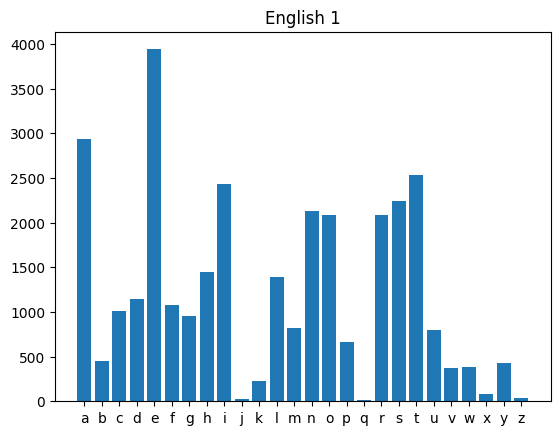

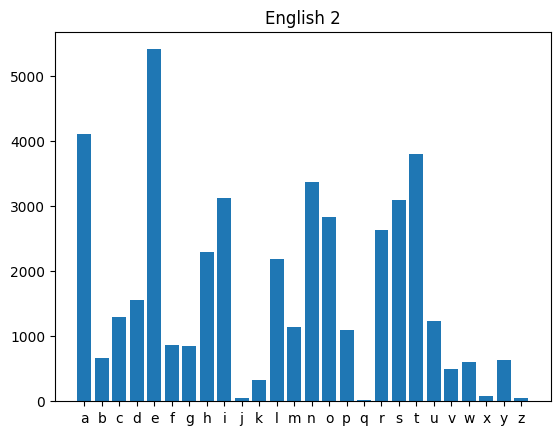

In [158]:
unigram_eng1 = Counter(ngrams(eng1,1))
plothistogram(unigram_eng1)
plt.title('English 1')
plt.show()
unigram_eng2 = Counter(ngrams(eng2,1))
plothistogram(unigram_eng2)
plt.title('English 2')
plt.show()

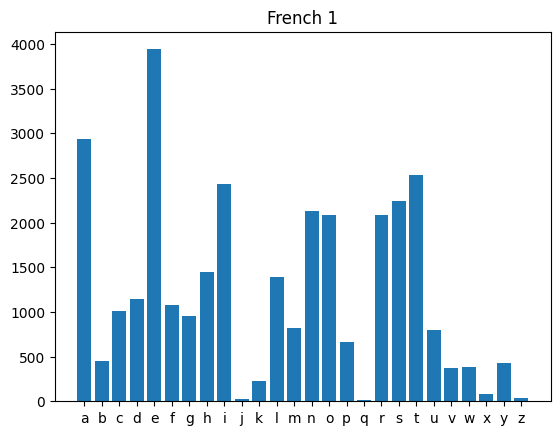

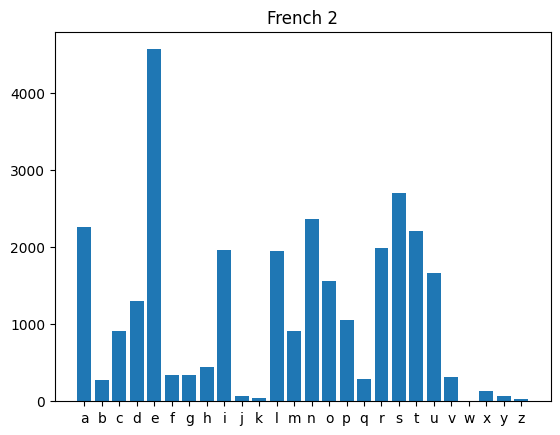

In [159]:
unigram_fr1 = Counter(ngrams(fr1,1))
plothistogram(unigram_eng1)
plt.title('French 1')
plt.show()
unigram_fr2 = Counter(ngrams(fr2,1))
plothistogram(unigram_fr2)
plt.title('French 2')
plt.show()

We can see that the unigrams for French and English are very similar. So this is not a good feature if we want to distinguish between English and French. Let us look at bigrams.

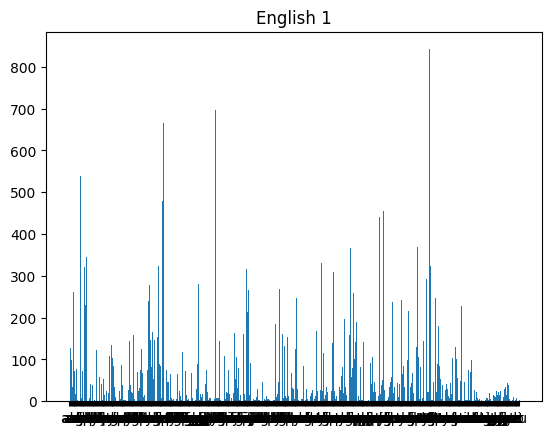

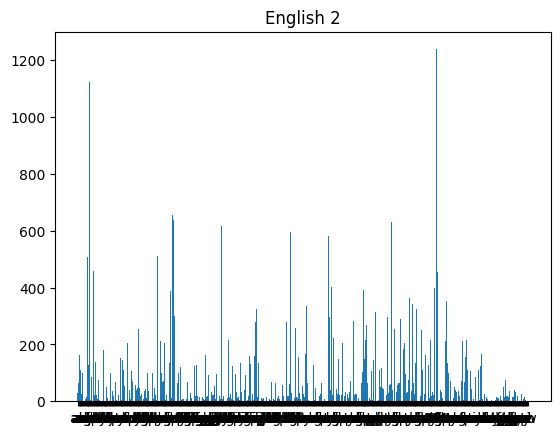

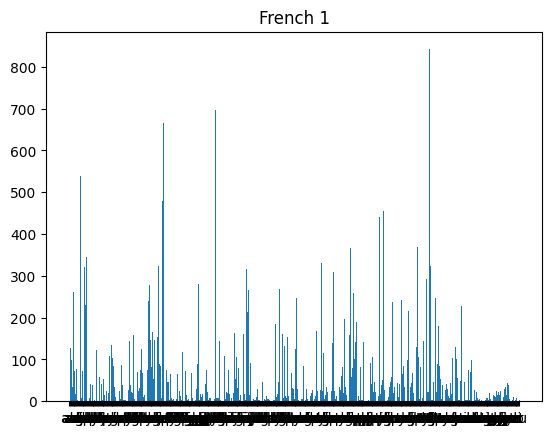

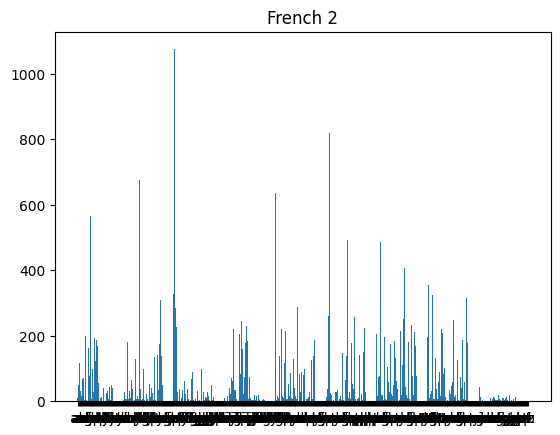

In [160]:
bigram_eng1 = Counter(ngrams(eng1,2)) # bigrams
plothistogram(bigram_eng1)
plt.title('English 1')
plt.show()

bigram_eng2 = Counter(ngrams(eng2,2))
plothistogram(bigram_eng2)
plt.title('English 2')
plt.show()

bigram_fr1 = Counter(ngrams(fr1,2))
plothistogram(bigram_eng1)
plt.title('French 1')
plt.show()

bigram_fr2 = Counter(ngrams(fr2,2))
plothistogram(bigram_fr2)
plt.title('French 2')
plt.show()

Another way to visualize bigrams is to use a 2-dimensional graph.

In [161]:
def plotbihistogram(ngram):
  freq = np.zeros((26,26))
  for ii in range(26):
    for jj in range(26):
      freq[ii,jj] = ngram[(chr(ord('a')+ii), chr(ord('a')+jj))]
  plt.imshow(freq, cmap = 'jet')
  return freq

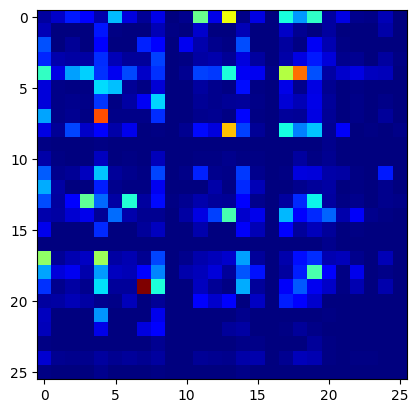

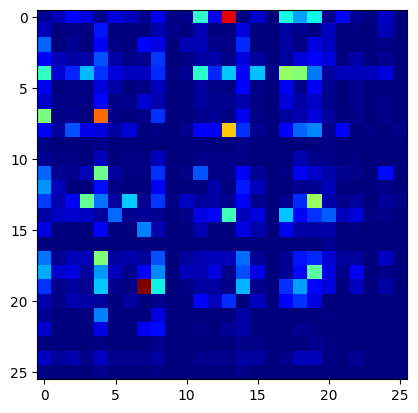

In [162]:
bieng1 = plotbihistogram(bigram_eng1)
plt.show()
bieng2 = plotbihistogram(bigram_eng2)

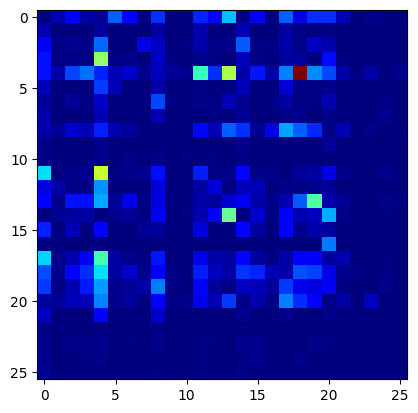

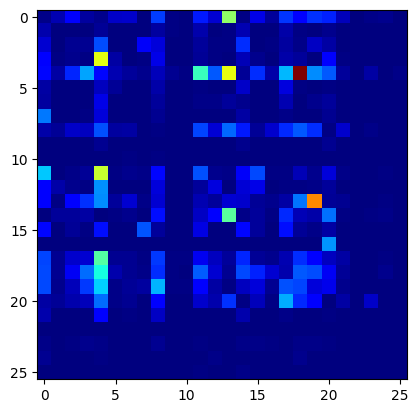

In [163]:
bifr1 = plotbihistogram(bigram_fr1)
plt.show()
bifr2 = plotbihistogram(bigram_fr2)

Let us look at the top 10 ngrams for each text.

In [164]:
from IPython.core.debugger import set_trace

def ind2tup(ind):
  ind = int(ind)
  i = int(ind/26)
  j = int(ind%26)
  return (chr(ord('a')+i), chr(ord('a')+j))

def ShowTopN(bifreq, n=10):
  f = bifreq.flatten()
  arg = np.argsort(-f)
  for ii in range(n):
    print(f'{ind2tup(arg[ii])} : {f[arg[ii]]}')

In [165]:
print('\nEnglish 1:')
ShowTopN(bieng1)
print('\nEnglish 2:')
ShowTopN(bieng2)
print('\nFrench 1:')
ShowTopN(bifr1)
print('\nFrench 2:')
ShowTopN(bifr2)


English 1:
('t', 'h') : 842.0
('h', 'e') : 697.0
('e', 's') : 665.0
('i', 'n') : 594.0
('a', 'n') : 538.0
('e', 'r') : 478.0
('r', 'e') : 454.0
('r', 'a') : 441.0
('a', 'l') : 404.0
('n', 'd') : 393.0

English 2:
('t', 'h') : 1238.0
('a', 'n') : 1123.0
('h', 'e') : 983.0
('i', 'n') : 863.0
('n', 't') : 664.0
('e', 'r') : 655.0
('e', 's') : 637.0
('r', 'e') : 629.0
('h', 'a') : 618.0
('l', 'e') : 597.0

French 1:
('e', 's') : 737.0
('l', 'e') : 438.0
('e', 'n') : 409.0
('d', 'e') : 390.0
('o', 'n') : 349.0
('n', 't') : 329.0
('r', 'e') : 317.0
('e', 'l') : 308.0
('l', 'a') : 254.0
('s', 'e') : 254.0

French 2:
('e', 's') : 1075.0
('n', 't') : 820.0
('e', 'n') : 678.0
('d', 'e') : 675.0
('l', 'e') : 635.0
('a', 'n') : 566.0
('o', 'n') : 492.0
('r', 'e') : 486.0
('e', 'l') : 451.0
('s', 'e') : 407.0


We observe that the bigrams are similar across different topics but different across languages. Thus, the bigram frequency is a good feature for distinguishing languages, but not for distinguishing topics.

Thus, we were able to convert a many-dimensional input (the text) to 26 dimesions (unigrams) or 26*26 dimensions (bigrams).


A few ways to explore:
1. Try with different languages.
2. The topics we used are quite similar, wikipedia articles of 'elephant' and 'giraffe'. What happens if we use very different topics? What if we use text from another source than Wikipedia?
3. How can we use and visualize trigrams and higher n-grams?

/usr/local/lib/python3.10/dist-packages/wikipedia/wikipedia.py:389: GuessedAtParserWarning:

No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.10/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.




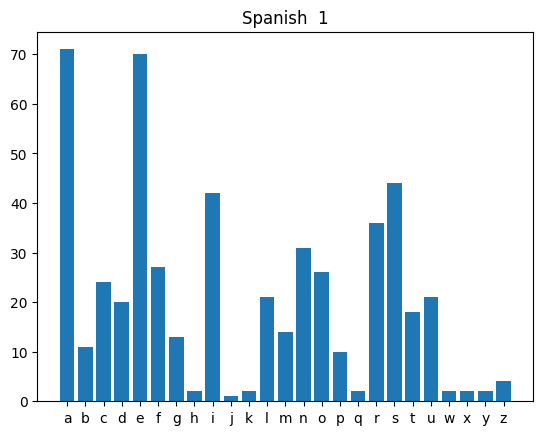

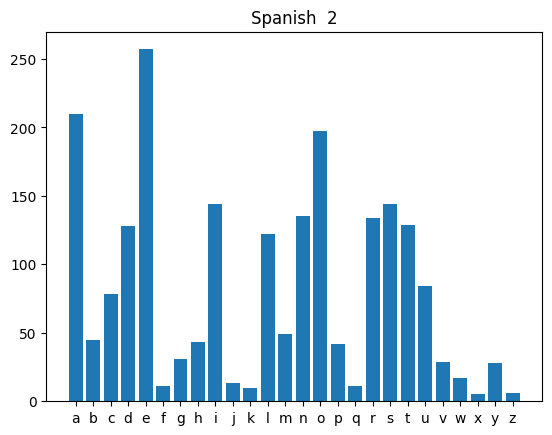

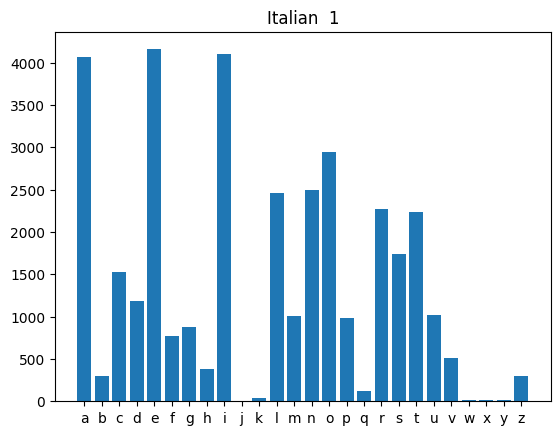

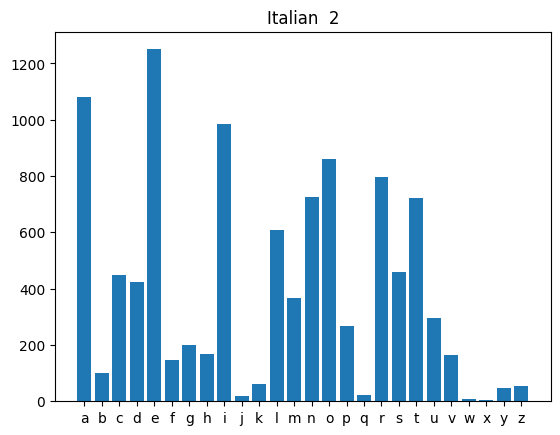

In [166]:
# Ans 1 Different Languages
import random
wikipedia.set_lang('es')
spanish1 = wikipedia.page(topic1,).content
try:
    p = wikipedia.page(topic2)
except wikipedia.DisambiguationError as e:
    s = random.choice(e.options)
    spanish2 = wikipedia.page(s).content

wikipedia.set_lang('it')

ita1 = wikipedia.page(topic1).content
ita2 = wikipedia.page(topic2).content

spanish1 = cleanup(spanish1)
spanish2 = cleanup(spanish2)
ita1 = cleanup(ita1)
ita2 = cleanup(ita2)


unigram_span1 = Counter(ngrams(spanish1,1))
plothistogram(unigram_span1)
plt.title('Spanish  1')
plt.show()
unigram_span2 = Counter(ngrams(spanish2,1))
plothistogram(unigram_span2)
plt.title('Spanish  2')
plt.show()

unigram_ita1 = Counter(ngrams(ita1,1))
plothistogram(unigram_ita1)
plt.title('Italian  1')
plt.show()
unigram_ita2 = Counter(ngrams(ita2,1))
plothistogram(unigram_ita2)
plt.title('Italian  2')
plt.show()

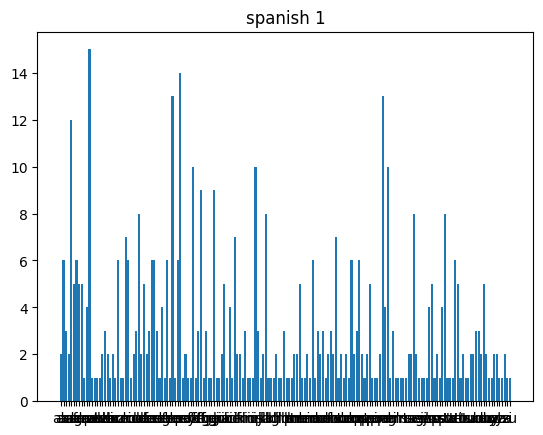

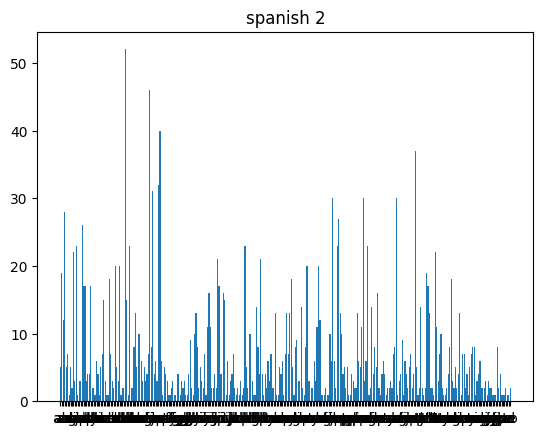

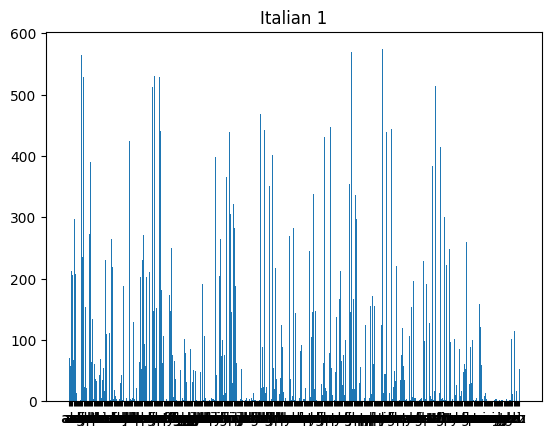

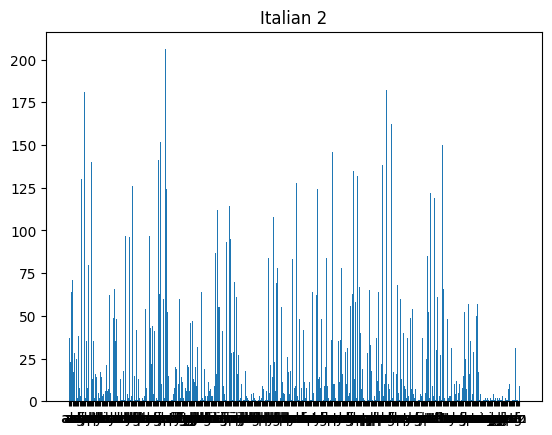

In [167]:
bigram_spanish1 = Counter(ngrams(spanish1,2))
plothistogram(bigram_spanish1)
plt.title('spanish 1')
plt.show()

bigram_spanish2 = Counter(ngrams(spanish2,2))
plothistogram(bigram_spanish2)
plt.title('spanish 2')
plt.show()

bigram_ita1 = Counter(ngrams(ita1,2))
plothistogram(bigram_ita1)
plt.title('Italian 1')
plt.show()

bigram_ita2 = Counter(ngrams(ita2,2))
plothistogram(bigram_ita2)
plt.title('Italian 2')
plt.show()

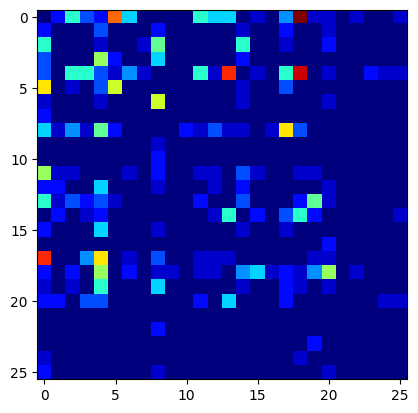

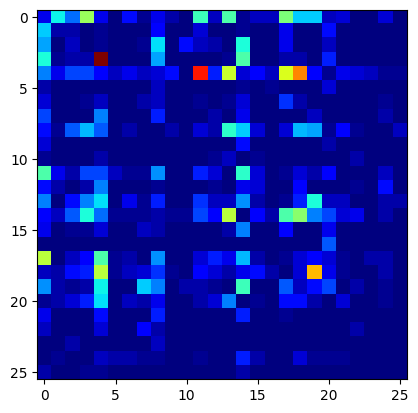

In [168]:
bisp1 = plotbihistogram(bigram_spanish1)
plt.show()
bisp2 = plotbihistogram(bigram_spanish2)

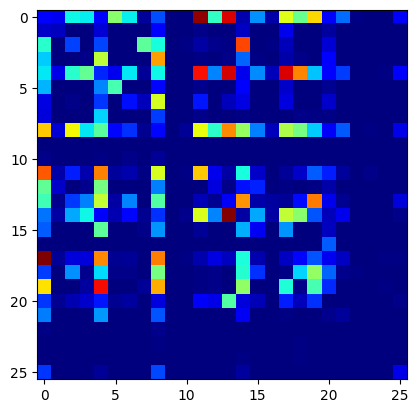

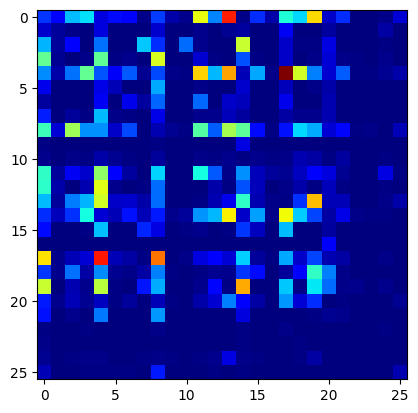

In [169]:
ita_bi1 = plotbihistogram(bigram_ita1)
plt.show()
ita_bi2 = plotbihistogram(bigram_ita2)

In [170]:
print('Spanish 1:')
ShowTopN(bisp1)
print('Spanish 2:')
ShowTopN(bisp2)
print('Italian 1:')
ShowTopN(ita_bi1)
print('Italian 2:')
ShowTopN(ita_bi2)

Spanish 1:
('a', 's') : 15.0
('e', 's') : 14.0
('r', 'a') : 13.0
('e', 'n') : 13.0
('a', 'f') : 12.0
('f', 'a') : 10.0
('r', 'e') : 10.0
('i', 'r') : 10.0
('f', 'f') : 9.0
('g', 'i') : 9.0
Spanish 2:
('d', 'e') : 52.0
('e', 'l') : 46.0
('e', 's') : 40.0
('s', 't') : 37.0
('e', 'r') : 32.0
('e', 'n') : 31.0
('r', 'a') : 30.0
('o', 'n') : 30.0
('s', 'e') : 30.0
('a', 'd') : 28.0
Italian 1:
('r', 'a') : 574.0
('o', 'n') : 570.0
('a', 'l') : 565.0
('e', 'n') : 531.0
('e', 'r') : 528.0
('a', 'n') : 528.0
('t', 'e') : 514.0
('e', 'l') : 512.0
('c', 'o') : 478.0
('l', 'a') : 468.0
Italian 2:
('e', 'r') : 206.0
('r', 'e') : 182.0
('a', 'n') : 181.0
('r', 'i') : 162.0
('e', 'n') : 152.0
('t', 'o') : 150.0
('n', 't') : 146.0
('e', 'l') : 141.0
('a', 't') : 140.0
('r', 'a') : 138.0


**Ques 2**
The topics we used are quite similar, wikipedia articles of 'elephant' and 'giraffe'. What happens if we use very different topics? What if we use text from another source than Wikipedia?

**Ans 2** **i)** Using different task and different site data can have a significant impact on the data ,model trained on one topic will perform poorly when asked to work on another topic

**ii)**Text from different sources may have biases which may affect the model

**iii)**Utilising data from other sources may require aditional cleaning techniques to enusure data taken from different sources is uniform

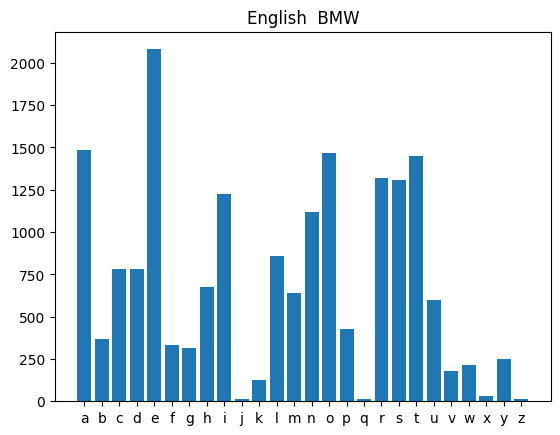

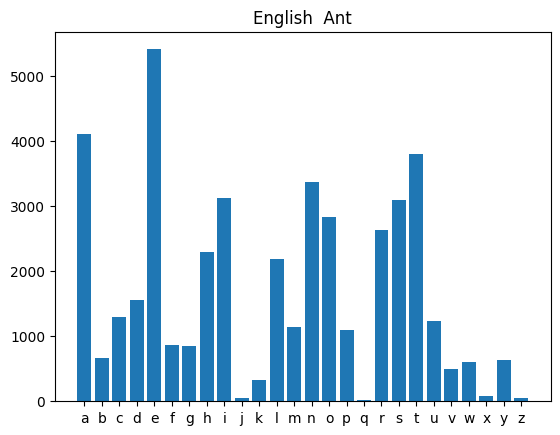

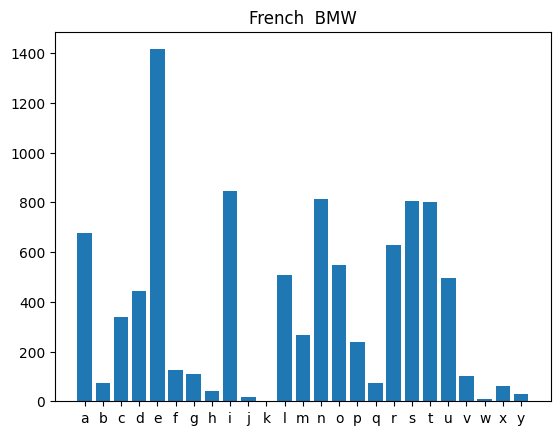

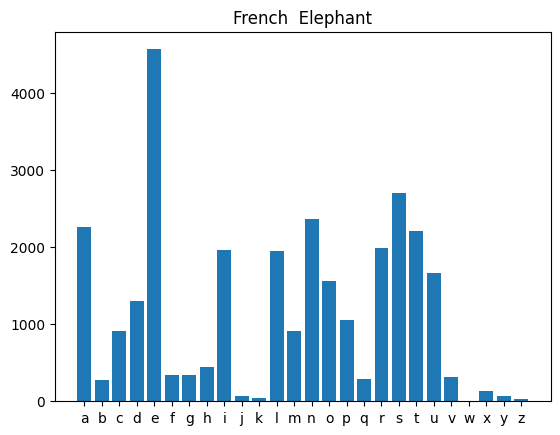

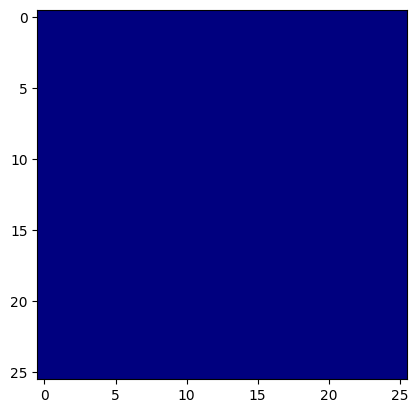

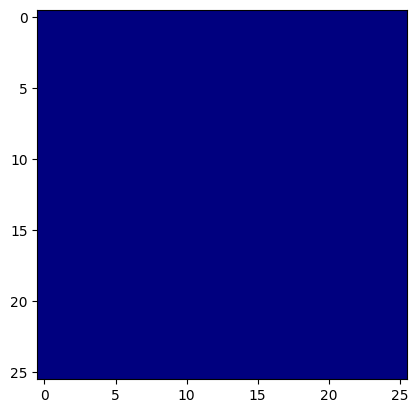

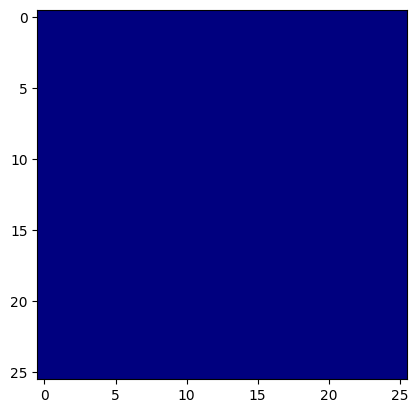

In [172]:
topic1='Audi'
topic2='Elephant'
wikipedia.set_lang('en')
eng2 = wikipedia.page(topic2).content
try:
    p = wikipedia.page(topic1)
except wikipedia.DisambiguationError as e:
    s = random.choice(e.options)
    eng1 = wikipedia.page(s).content
# try:
#     p = wikipedia.page(topic2)
# except wikipedia.DisambiguationError as e:
#     s = random.choice(e.options)
#     eng2 = wikipedia.page(s).content

wikipedia.set_lang('fr')

frenc1 = wikipedia.page(topic1).content
frenc2 = wikipedia.page(topic2).content

eng1 = cleanup(eng1)
eng2 = cleanup(eng2)
frenc1 = cleanup(frenc1)
frenc2 = cleanup(frenc2)


unigram_en1 = Counter(ngrams(eng1,1))
plothistogram(unigram_en1)
plt.title('English  BMW')
plt.show()
unigram_en2 = Counter(ngrams(eng2,1))
plothistogram(unigram_en2)
plt.title('English  Ant')
plt.show()

unigram_fre1 = Counter(ngrams(frenc1,1))
plothistogram(unigram_fre1)
plt.title('French  BMW')
plt.show()

unigram_fre2 = Counter(ngrams(frenc2,1))
plothistogram(unigram_fre2)
plt.title('French  Elephant')
plt.show()

bisp1 = plotbihistogram(unigram_en1)
plt.show()
bisp2 = plotbihistogram(unigram_en2)

bisp1 = plotbihistogram(unigram_fre1)
plt.show()
bisp2 = plotbihistogram(unigram_fre2)

**Q 3 How can we use and visualize trigrams and higher n-grams?**

**ANS**  we can use word clouds bar charts for trigram or higher as they are helpful in capturing   the relationships and context between words or tokens within a text

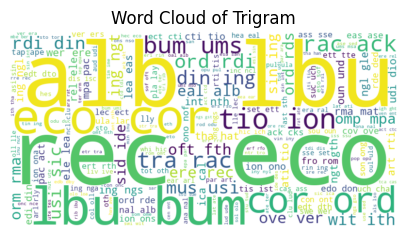

In [173]:
from wordcloud import WordCloud

trigrams = list(ngrams(eng1, 3))

t=[]
for i in trigrams:
  t.append(''.join(i))

trigram_counts=" "
trigram_counts=trigram_counts.join(t)
# trigram_counts = Counter(trigrams)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(trigram_counts)


plt.figure(figsize=(5, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Trigram")
plt.show()

# Part 2: Written numbers

We will use a subset of the MNIST dataset. Each input character is represented in a 28*28 array. Let us see if we can extract some simple features from these images which can help us distinguish between the digits.

Load the dataset:

In [174]:
from keras.datasets import mnist

#loading the dataset
(train_X, train_y), (test_X, test_y) = mnist.load_data()

Extract a subset of the data for our experiment:

In [175]:
no1 = train_X[train_y==1,:,:]
no0 = train_X[train_y==0,:,:]

Let us visualize a few images here:

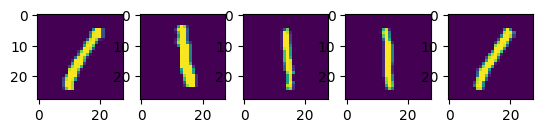

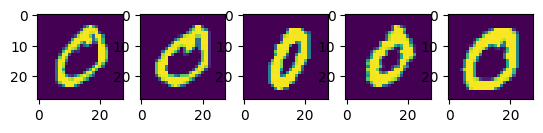

In [176]:
for ii in range(5):
  plt.subplot(1, 5, ii+1)
  plt.imshow(no1[ii,:,:])
plt.show()
for ii in range(5):
  plt.subplot(1, 5, ii+1)
  plt.imshow(no0[ii,:,:])
plt.show()

suNow, let us start with a simple feature: the sum of all pixels and see how good this feature is.

In [209]:
sum1 = np.sum(no1>0, (1,2)) # threshold before adding up
sum0 = np.sum(no0>0, (1,2))


Let us visualize how good this feature is: (X-axis is mean, y-axis is the digit)

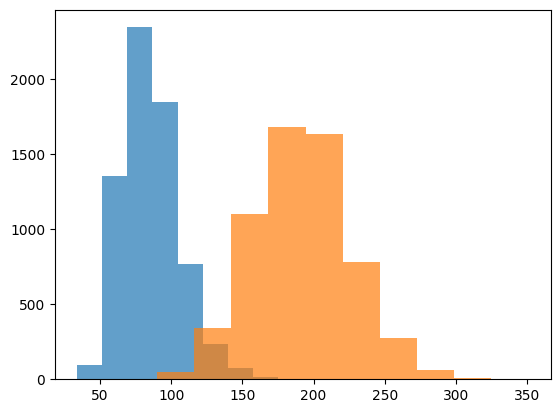

In [191]:
plt.hist(sum1, alpha=0.7);
plt.hist(sum0, alpha=0.7);

We can already see that this feature separates the two classes quite well.

Let us look at another, more complicated feature. We will count the number black pixels that are surrounded on four sides by non-black pixels, or "hole pixels".

In [179]:
def cumArray(img):
  img2 = img.copy()
  for ii in range(1, img2.shape[1]):
    img2[ii,:] = img2[ii,:] + img2[ii-1,:]  # for every row, add up all the rows above it.
  img2 = img2>0
  return img2

def getHolePixels(img):
  im1 = cumArray(img)
  im2 = np.rot90(cumArray(np.rot90(img)), 3) # rotate and cumulate it again for differnt direction
  im3 = np.rot90(cumArray(np.rot90(img, 2)), 2)
  im4 = np.rot90(cumArray(np.rot90(img, 3)), 1)
  hull =  im1 & im2 & im3 & im4 # this will create a binary image with all the holes filled in.
  hole = hull & ~ (img>0) # remove the original digit to leave behind the holes
  return hole

Visualize a few:

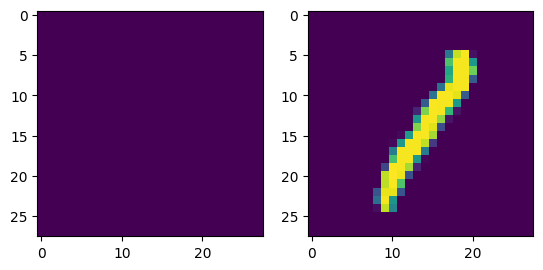

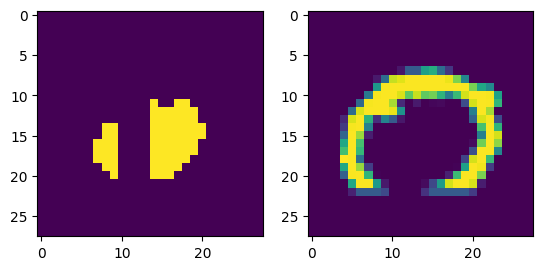

In [180]:
imgs = [no1[456,:,:],  no0[456,:,:]]
for img in imgs:
  plt.subplot(1,2,1)
  plt.imshow(getHolePixels(img))
  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.show()

Now let us plot the number of hole pixels and see how this feature behaves

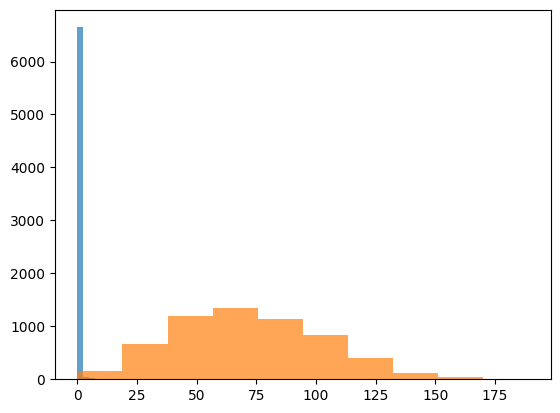

In [181]:
hole1 = np.array([getHolePixels(i).sum() for i in no1])
hole0 = np.array([getHolePixels(i).sum() for i in no0])

plt.hist(hole1, alpha=0.7);
plt.hist(hole0, alpha=0.7);

This feature works even better to distinguish between one and zero.


Now let us try the number of pixels in the 'hull' or the number with the holes filled in:

In [182]:
def getHullPixels(img):
  im1 = cumArray(img)
  im2 = np.rot90(cumArray(np.rot90(img)), 3) # rotate and cumulate it again for differnt direction
  im3 = np.rot90(cumArray(np.rot90(img, 2)), 2)
  im4 = np.rot90(cumArray(np.rot90(img, 3)), 1)
  hull =  im1 & im2 & im3 & im4 # this will create a binary image with all the holes filled in.
  return hull

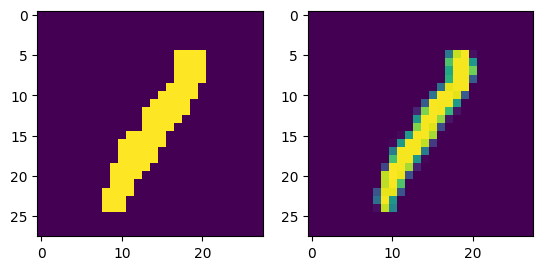

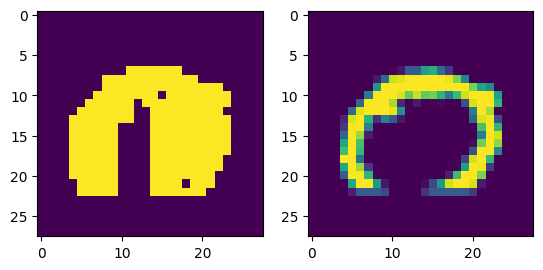

In [183]:
imgs = [no1[456,:,:],  no0[456,:,:]]
for img in imgs:
  plt.subplot(1,2,1)
  plt.imshow(getHullPixels(img))
  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.show()

Plotting the number of hull pixels versus the digit:

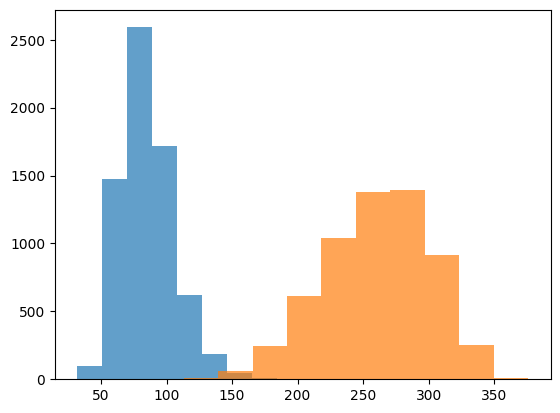

In [184]:
hull1 = np.array([getHullPixels(i).sum() for i in no1])
hull0 = np.array([getHullPixels(i).sum() for i in no0])

plt.hist(hull1, alpha=0.7);
plt.hist(hull0, alpha=0.7);

Let us try one more feature, where we look at the number of boundary pixels in each image.

In [185]:
def minus(a, b):
  return a & ~ b

def getBoundaryPixels(img):
  img = img.copy()>0  # binarize the image
  rshift = np.roll(img, 1, 1)
  lshift = np.roll(img, -1 ,1)
  ushift = np.roll(img, -1, 0)
  dshift = np.roll(img, 1, 0)
  boundary = minus(img, rshift) | minus(img, lshift) | minus(img, ushift) | minus(img, dshift)
  return boundary

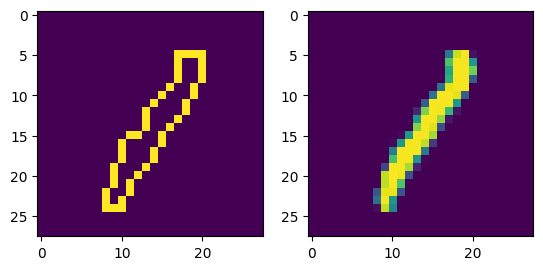

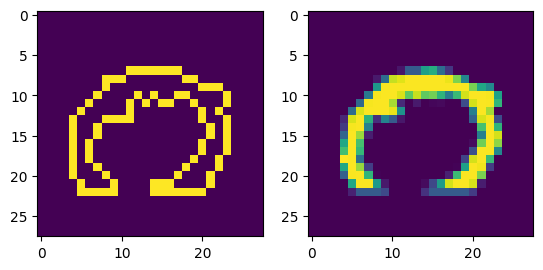

In [186]:
imgs = [no1[456,:,:],  no0[456,:,:]]
for img in imgs:
  plt.subplot(1,2,1)
  plt.imshow(getBoundaryPixels(img))
  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.show()

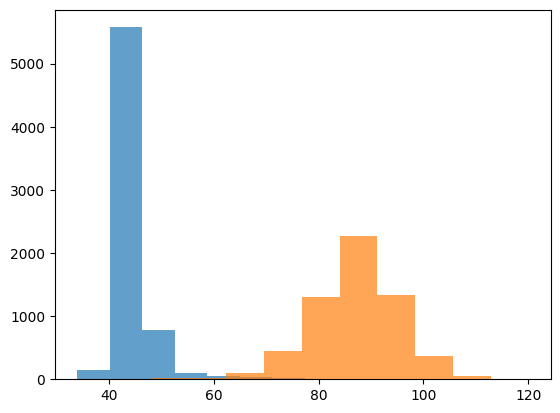

In [187]:
bound1 = np.array([getBoundaryPixels(i).sum() for i in no1])
bound0= np.array([getBoundaryPixels(i).sum() for i in no0])

plt.hist(bound1, alpha=0.7);
plt.hist(bound0, alpha=0.7);

What will happen if we plot two features together?

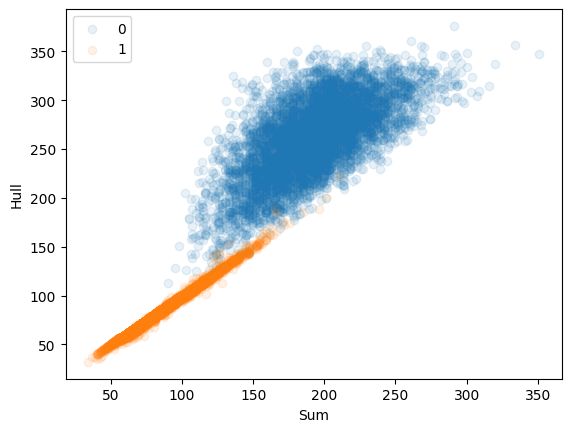

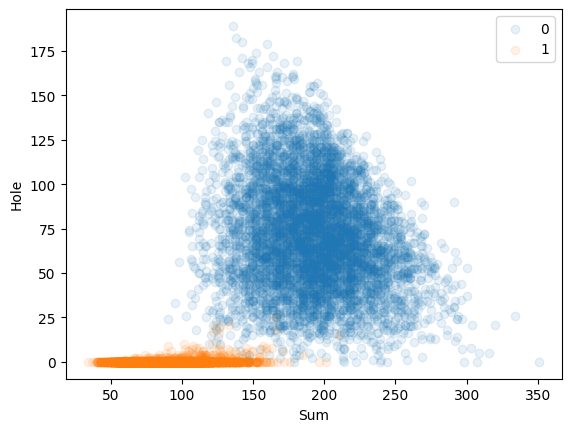

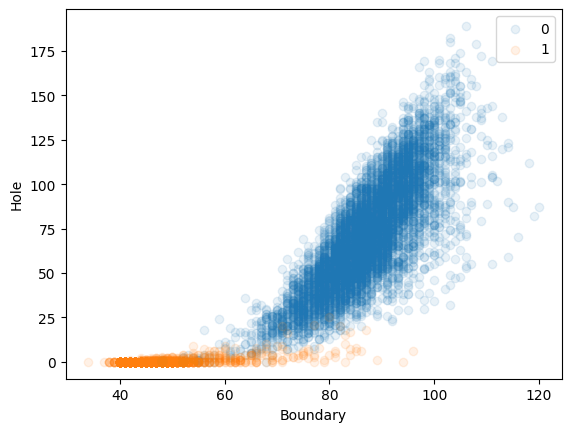

In [188]:
# Sum and hull
plt.scatter(sum0, hull0, alpha=0.1)
plt.scatter(sum1, hull1, alpha=0.1)
plt.xlabel('Sum')
plt.ylabel('Hull')
plt.legend(['0','1'])
plt.show()

# Sum and hole
plt.scatter(sum0, hole0, alpha=0.1)
plt.scatter(sum1, hole1, alpha=0.1)
plt.xlabel('Sum');
plt.ylabel('Hole');
plt.legend(['0','1'])
plt.show()

# Hole and boundary
plt.scatter(bound0, hole0, alpha=0.1)
plt.scatter(bound1, hole1, alpha=0.1)
plt.xlabel('Boundary');
plt.ylabel('Hole');
plt.legend(['0','1'])
plt.show()

Now let us try plotting 3 features together.

In [189]:
cl1 = ['class 1']*len(sum1)
cl0 = ['class 0']*len(sum0)
df = pd.DataFrame(list(zip(np.concatenate((hole0, hole0)), np.concatenate((sum1,sum0)),
                           np.concatenate((bound1,bound0)), np.concatenate((cl1, cl0)))),
               columns =['Hole', 'Sum', 'Boundary', 'Class'])
df.head()
fig = px.scatter_3d(df, x='Hole', y='Sum', z='Boundary', color='Class', opacity=0.1)
fig.show()

Feel free to explore the above graph with your mouse.


We have seen that we extracted four features from a 28*28 dimensional image.


Some questions to explore:
1. Which is the best combination of features?
2. How would you test or visualize four or more features?
3. Can you come up with your own features?
4. Will these features work for different classes other than 0 and 1?
5. What will happen if we take more that two classes at a time?

**Q1 Which is the best combination of features?**

**Ans 1** Sum of Pixel and Hull pixel is useful for distinguishing the digits as they capture both shape and darkness

**Q2. How would you test or visualize four or more features?**
**Ans 2** Different ways of visualizing 4 or more features are

   i)**3D Surface Plots (4D visualization):** where x,y,z represent 4 features and colour represent the 4th feature

   ii)**Radial Plots** :- it is used to compare multiple fetures at a time

   iii)**Bubble Charts**:-Suitable if have more than 4 features at a time.Size colour and other parameters can be used to show many feature

   iV)**Reduce features and then plot on normal plots**

**Q3 Can you come up with your own features?**

**Ans 3** i) Symmetry Features can be used to differentialte numbers like 8 and  0

ii) Centroid can also be found as different numbers have centroid located at different position

iii) compactness can also be used to identifi images

iv) finding the curveature helps to identify numbers like 7 ,1 ,4

**Q4 Will these features work for different classes other than 0 and 1?**

**Ans4** The features used above will face issues when they are used to classify  other digits . for example the features like sum of pixels can clasify 1 and 0 due to higher number of coloured pixels in 0 but it cannot differentiate 6 and 9 or numbers like 4 or 3.

**Q5 What will happen if we take more that two classes at a time?**

**Ans 5** The presence of more than 2 classes would lead to multiclass classification which requires complex boundary and more comprehensive features which are apt for classification of the digits


In [194]:
no6 = train_X[train_y==6,:,:]
no9 = train_X[train_y==9,:,:]

In [195]:
sum6 = np.sum(no6>0, (1,2))
sum9 = np.sum(no9>0, (1,2))

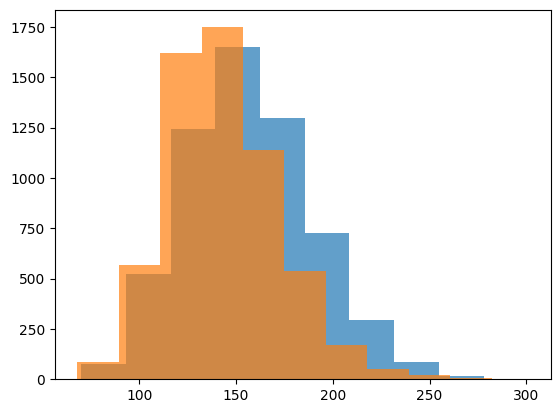

In [196]:
plt.hist(sum6, alpha=0.7);
plt.hist(sum9, alpha=0.7);
# difficult to differntitate 6 and 9 using sum

In [197]:
no2 = train_X[train_y==2,:,:]
no3 = train_X[train_y==3,:,:]
no4 = train_X[train_y==4,:,:]

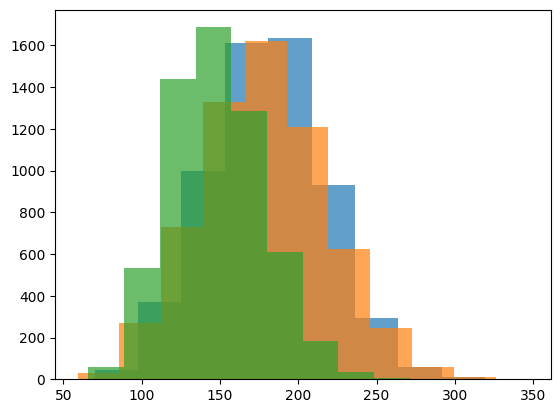

In [198]:
hull2 = np.array([getHullPixels(i).sum() for i in no2])
hull3 = np.array([getHullPixels(i).sum() for i in no3])
hull4 = np.array([getHullPixels(i).sum() for i in no4])

plt.hist(hull2, alpha=0.7);
plt.hist(hull3, alpha=0.7);
plt.hist(hull4, alpha=0.7);
#hull pixel not usefull to classify 2 ,3 and 4

In [249]:

def centroid_num(im):
    row_sums = np.sum(im, axis=1)
    col_sums = np.sum(im, axis=0)
    x_cen = np.sum(np.arange(len(row_sums)) * row_sums) / np.sum(row_sums)
    y_cen = np.sum(np.arange(len(col_sums)) * col_sums) / np.sum(col_sums)

    return x_cen, y_cen

no3_cent = np.array([centroid_num(i) for i in no3])

no1_cent = np.array([centroid_num(i) for i in no1])


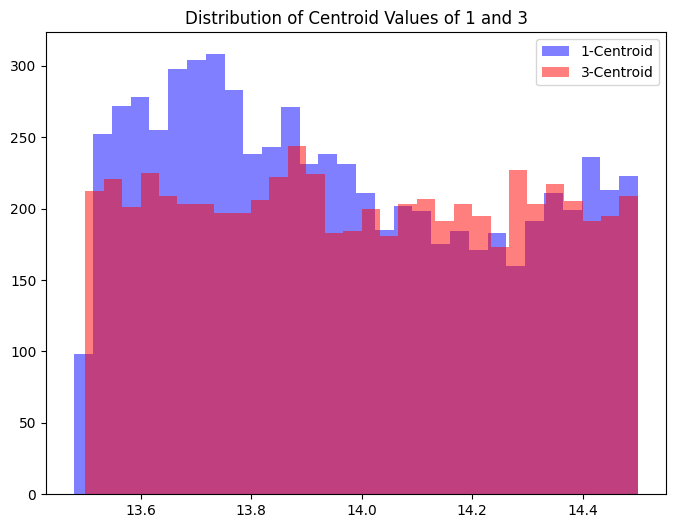

In [250]:
plt.figure(figsize=(8, 6))
plt.hist(no1_cent[:, 0], bins=30, alpha=0.5, color='b', label='1-Centroid')
plt.hist(no3_cent[:, 0], bins=30, alpha=0.5, color='r', label='3-Centroid')
plt.title('Distribution of Centroid Values of 1 and 3')
plt.legend()
plt.show()

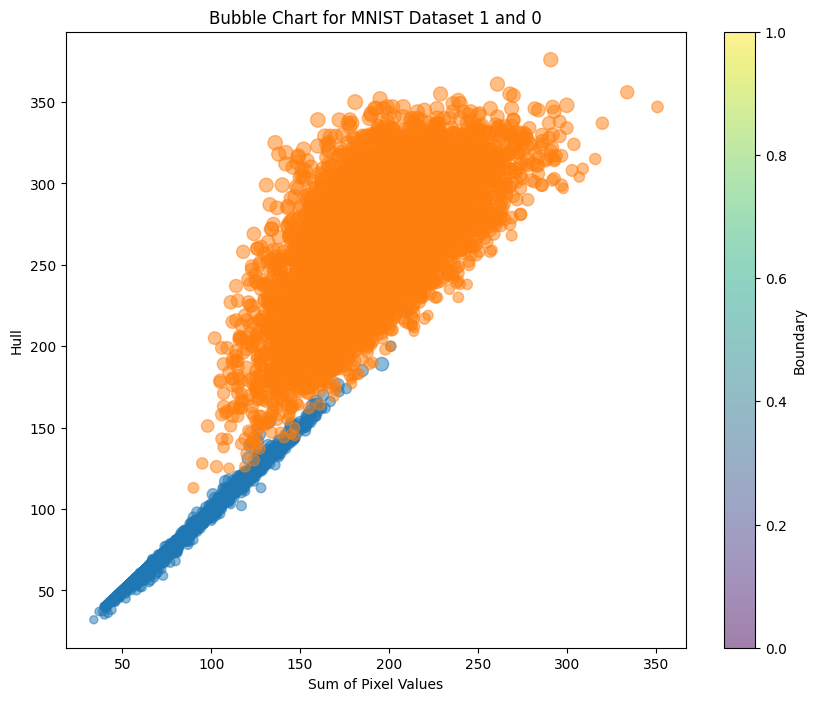

In [254]:

plt.figure(figsize=(10, 8))
plt.scatter(sum1, hull1, s=bound1, alpha=0.5)
plt.scatter(sum0, hull0, s=bound0, alpha=0.5)
plt.xlabel('Sum of Pixel Values')
plt.ylabel('Hull')
plt.title('Bubble Chart for MNIST Dataset 1 and 0')
plt.colorbar(label='Boundary')
plt.show()
